In [1]:
import pandas as pd

df = pd.read_csv(r"C:\Users\gurra\DecisionMaking\spam.csv",encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [2]:
print(df.columns)


Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')


In [3]:
# Keep only required columns
df = df[['v1', 'v2']]

# Rename columns
df.columns = ['label', 'text']

# Convert labels to numeric
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

# Display first 5 rows
print(df.head())

   label                                               text
0      0  Go until jurong point, crazy.. Available only ...
1      0                      Ok lar... Joking wif u oni...
2      1  Free entry in 2 a wkly comp to win FA Cup fina...
3      0  U dun say so early hor... U c already then say...
4      0  Nah I don't think he goes to usf, he lives aro...


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.ensemble import RandomForestRegressor

In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
from sklearn.naive_bayes import GaussianNB


In [7]:
df['text_length']=df['text'].apply(len)
df['num_words']=df['text'].apply(lambda x: len(x.split()))
df['num_digits']=df['text'].apply(lambda x: sum(c.isdigit() for c in x))
X=df[['text_length','num_words','num_digits']]
y=df['label']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)
gnb=GaussianNB()
gnb.fit(X_train_scaled,y_train)
y_pred_gnb=gnb.predict(X_test_scaled)


In [8]:
from sklearn.metrics import accuracy_score

In [9]:
from sklearn.metrics import confusion_matrix,classification_report

In [10]:
print("Accuracy:", accuracy_score(y_test, y_pred_gnb))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_gnb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_gnb))

Accuracy: 0.9802690582959641

Confusion Matrix:
 [[953  12]
 [ 10 140]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       965
           1       0.92      0.93      0.93       150

    accuracy                           0.98      1115
   macro avg       0.96      0.96      0.96      1115
weighted avg       0.98      0.98      0.98      1115



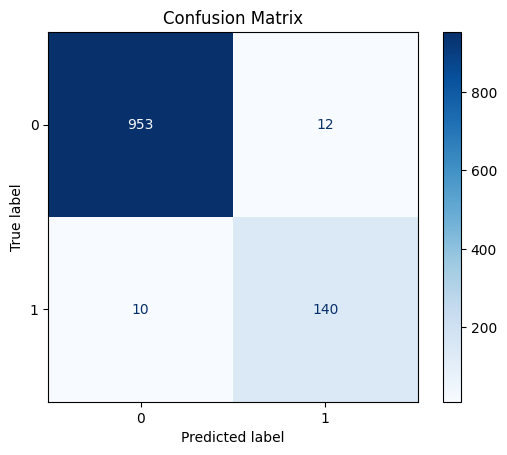

In [19]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_pred_gnb,
    cmap="Blues",
    values_format="d"
)

plt.title("Confusion Matrix")
plt.show()

In [12]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [13]:
#convert text data intp word count vectors
vectorizer = CountVectorizer(stop_words='english')
X_counts = vectorizer.fit_transform(df['text'])
#convert counts to TF-IDF reprsentation
tfidf_transformer = TfidfTransformer()
X_tfidf = tfidf_transformer.fit_transform(X_counts)

#split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X_tfidf, df['label'], test_size=0.2, random_state=42
)

#train the multinomial naive bayes
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
y_pred_mnb = mnb.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_mnb))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_mnb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_mnb))

Accuracy: 0.968609865470852

Confusion Matrix:
 [[965   0]
 [ 35 115]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.77      0.87       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.93      1115
weighted avg       0.97      0.97      0.97      1115



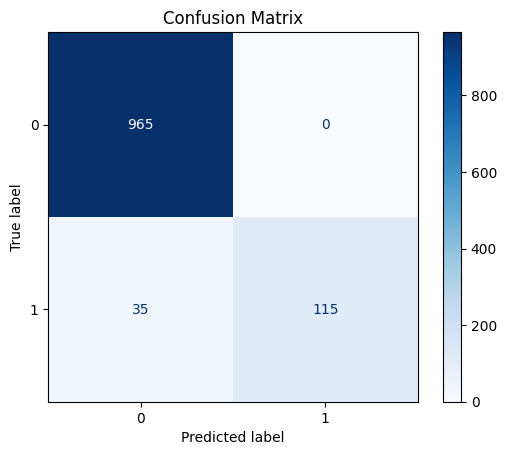

In [18]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_pred_mnb,
    cmap="Blues",
    values_format="d"
)

plt.title("Confusion Matrix")
plt.show()

In [14]:
from sklearn.naive_bayes import BernoulliNB

In [15]:
important_words=["free","win","offer","money","urgent"]
for word in important_words:
    df[word]=df['text'].apply(lambda x: 1 if word in x.lower() else 0)
X=df[important_words]
y=df['label']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
bnb=BernoulliNB()
bnb.fit(X_train,y_train)
y_pred_bnb=bnb.predict(X_test)

In [16]:
print("Accuracy:", accuracy_score(y_test, y_pred_bnb))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_bnb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_bnb))

Accuracy: 0.895067264573991

Confusion Matrix:
 [[929  36]
 [ 81  69]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.96      0.94       965
           1       0.66      0.46      0.54       150

    accuracy                           0.90      1115
   macro avg       0.79      0.71      0.74      1115
weighted avg       0.88      0.90      0.89      1115



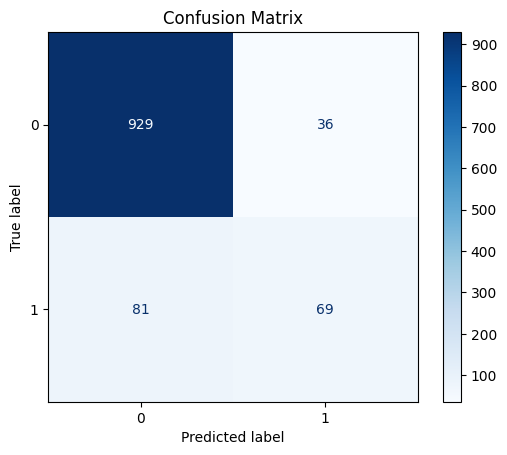

In [17]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_pred_bnb,
    cmap="Blues",
    values_format="d"
)

plt.title("Confusion Matrix")
plt.show()

In [20]:
import pandas as pd

df = pd.read_csv(r"C:\Users\gurra\DecisionMaking\spam.csv",encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [21]:
df = df[['v1', 'v2']]
df.columns = ['label', 'text']

In [22]:
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

In [23]:
print("Total messages:", df.shape[0])
print("\nMessage categories:\n", df['label'].value_counts())

Total messages: 5572

Message categories:
 label
0    4825
1     747
Name: count, dtype: int64


In [24]:
df['text_length'] = df['text'].apply(len)
df['num_words'] = df['text'].apply(lambda x: len(x.split()))
df['num_digits'] = df['text'].apply(lambda x: sum(c.isdigit() for c in x))

In [25]:
X = df[['text_length', 'num_words', 'num_digits']]
y = df['label']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [27]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [28]:
gnb = GaussianNB()
gnb.fit(X_train_scaled, y_train)

GaussianNB()

In [31]:
y_pred_gnb = gnb.predict(X_test_scaled)

In [32]:
print("Accuracy:", accuracy_score(y_test, y_pred_gnb))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_gnb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_gnb))

Accuracy: 0.9802690582959641

Confusion Matrix:
 [[953  12]
 [ 10 140]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       965
           1       0.92      0.93      0.93       150

    accuracy                           0.98      1115
   macro avg       0.96      0.96      0.96      1115
weighted avg       0.98      0.98      0.98      1115



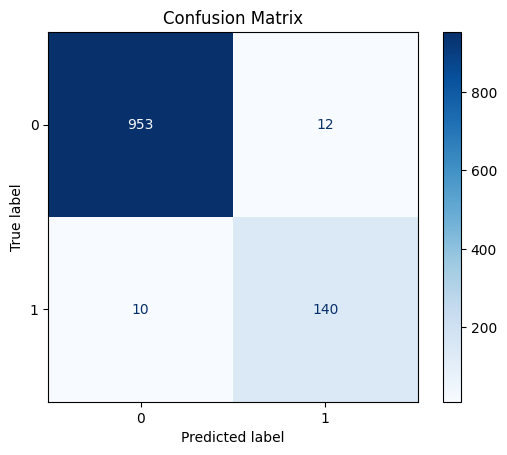

In [33]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_pred_gnb,
    cmap="Blues",
    values_format="d"
)

plt.title("Confusion Matrix")
plt.show()